# Maps of trend per grid cell

In [1]:
# import sys; sys.path.append('/rds/general/user/cb2714/home/wwa'); from wwa import *
import xarray as xr, numpy as np, pandas as pd, glob

import warnings; warnings.filterwarnings("ignore", category = FutureWarning) # otherwise there will be a LOT of warnings

import matplotlib, matplotlib.pyplot as plt

## Reshape dataframe into maps

In [2]:
def vec2map(x, mask):
    
    # reconstruct vector into map
    # create an empty map with NA in same cells as masks
    arr = mask.where(np.isnan(mask), 0)
    
    # get coordinates of non-empty cells
    px = np.argwhere(~np.isnan(mask.values))
    
    # Transfer vector values into non-empty cells in array
    if len(px) == len(x):
        for i in list(range(len(px))): arr[px[i,0], px[i,1]] = x[i]
        return arr
    else:
        print(str(len(x))+" values, but "+str(len(px))+" cells")
        return

In [6]:
# load target map showing original shape of data
tmplt = xr.open_dataset("map-tmplt_tg5x_era5.nc").t2m

In [11]:
# load all the flattened results and compile into a single dataframe
df = pd.concat([pd.read_csv(fnm, index_col = 0) for fnm in sorted(glob.glob("flattened-res/*.csv"))], axis = 1)

In [ ]:
# reconstruct map
res = xr.merge([vec2map(df.loc[r], tmplt).rename(r) for r in df.index])

# replace infinite values with very high value
res["PR"] = res.PR.where(np.isfinite(res.PR), 100).where(~np.isnan(res.PR))

In [20]:
# save
res.to_netcdf("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/EUR_heat/gridded-trend_tg5x_era5.nc")

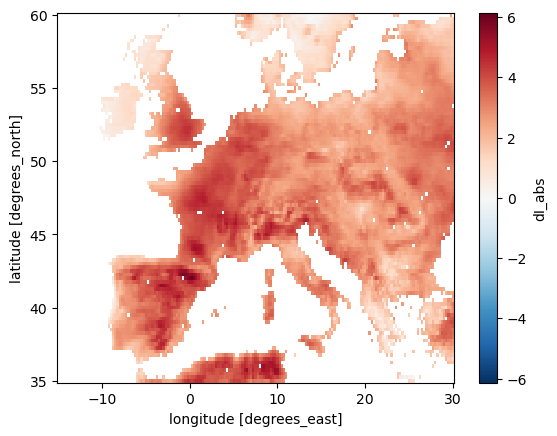

In [21]:
res.dI_abs.plot()